# Analyse exploratoire des données de Stack Overflow

In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
import IPython.display
import numpy as np
import pandas as pd 


print('### Data files ###')
for idx, file in enumerate(os.listdir('data')):
    print(idx, '-', file)
print('\n' + '-' *50 +'\n')

data = pd.DataFrame()

for idx, file in enumerate(os.listdir('data')):
    path = 'data/' + file
    df = pd.read_csv(path,
                     index_col = 0,
                     parse_dates=['CreationDate'],
                     na_values = 'NaN'
                    )
        
    data = pd.concat([data, df],
                      axis=0)
    
na_body_idx = data[data['Body'].isna()==True].index
data.drop(index = na_body_idx, inplace=True)
data.sort_values('CreationDate', inplace=True)
print("Dix premières valeurs du dataset")
display(data.head(10))
print('\n' + '-' *50 +'\n')
print(f"Nombre d'observations: {data.shape[0]}, nombre de variables: {data.shape[1]}")

### Data files ###
0 - dataQueryResults.csv

--------------------------------------------------

Dix premières valeurs du dataset


,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
70546339,2022-01-01 00:06:23,2,140,1,2,2,Using A Parent Associative Foreach Loop That C...,<p>I have a form that outputs images and their...,<php><foreach><pdo><associative-array>
70546372,2022-01-01 00:18:35,2,62,1,0,0,How to run sql script in mysql on Ubuntu?,<p>I am new to sql. I know I can run script wi...,<mysql><sql><script>
70546392,2022-01-01 00:25:21,1,537,1,1,1,token verification failing using JWK/JWT for u...,<p>I am trying to verify an idToken using a pu...,<python><oauth-2.0><jwt><rsa><jwk>
70546410,2022-01-01 00:31:32,2,280,2,6,1,"Should the ""opening work"" of a context manager...","<p>I found the <a href=""https://book.pythontip...",<python><contextmanager>
70546458,2022-01-01 00:44:42,-3,86,1,3,1,Do all datastructures use arrays?,"<p>Do all data structures use arrays? If not, ...",<java>
70546553,2022-01-01 01:19:39,0,48,0,5,1,"How do I check a row for a condition, and then...",<p>I'm struggling with some time series data i...,<python><pandas><time-series><signal-processing>
70546646,2022-01-01 02:04:19,0,65,0,3,1,Single Unit Test Takes ~40-50ms But 10 Copies ...,"<p><a href=""https://i.stack.imgur.com/RAmyG.pn...",<c#><visual-studio><unit-testing><.net-core><x...
70546668,2022-01-01 02:18:25,2,169,1,1,1,How to disable Github branch protection rule f...,<p>I have a git repository where some of the c...,<github>
70546683,2022-01-01 02:25:40,3,610,2,0,1,How to prevent go mod tidy from looking up a r...,<p>Consider the following setup:</p>\n<hr />\n...,<go><go-modules>



--------------------------------------------------

Nombre d'observations: 44631, nombre de variables: 9


## Test des valeurs manaquantes

Avant tout traitement nous souhaitons savoir si certaines observations variables sont manquantes.

In [19]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(data)

,Taux de complétion,Nombre de valeurs manquantes
CreationDate,100.0,0
Score,100.0,0
ViewCount,100.0,0
AnswerCount,100.0,0
CommentCount,100.0,0
FavoriteCount,100.0,0
Title,100.0,0
Body,100.0,0
Tags,100.0,0


Nous ne constatons aucune valeur manquante

## Analyse statistique des variables numériques

### CreationDate

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


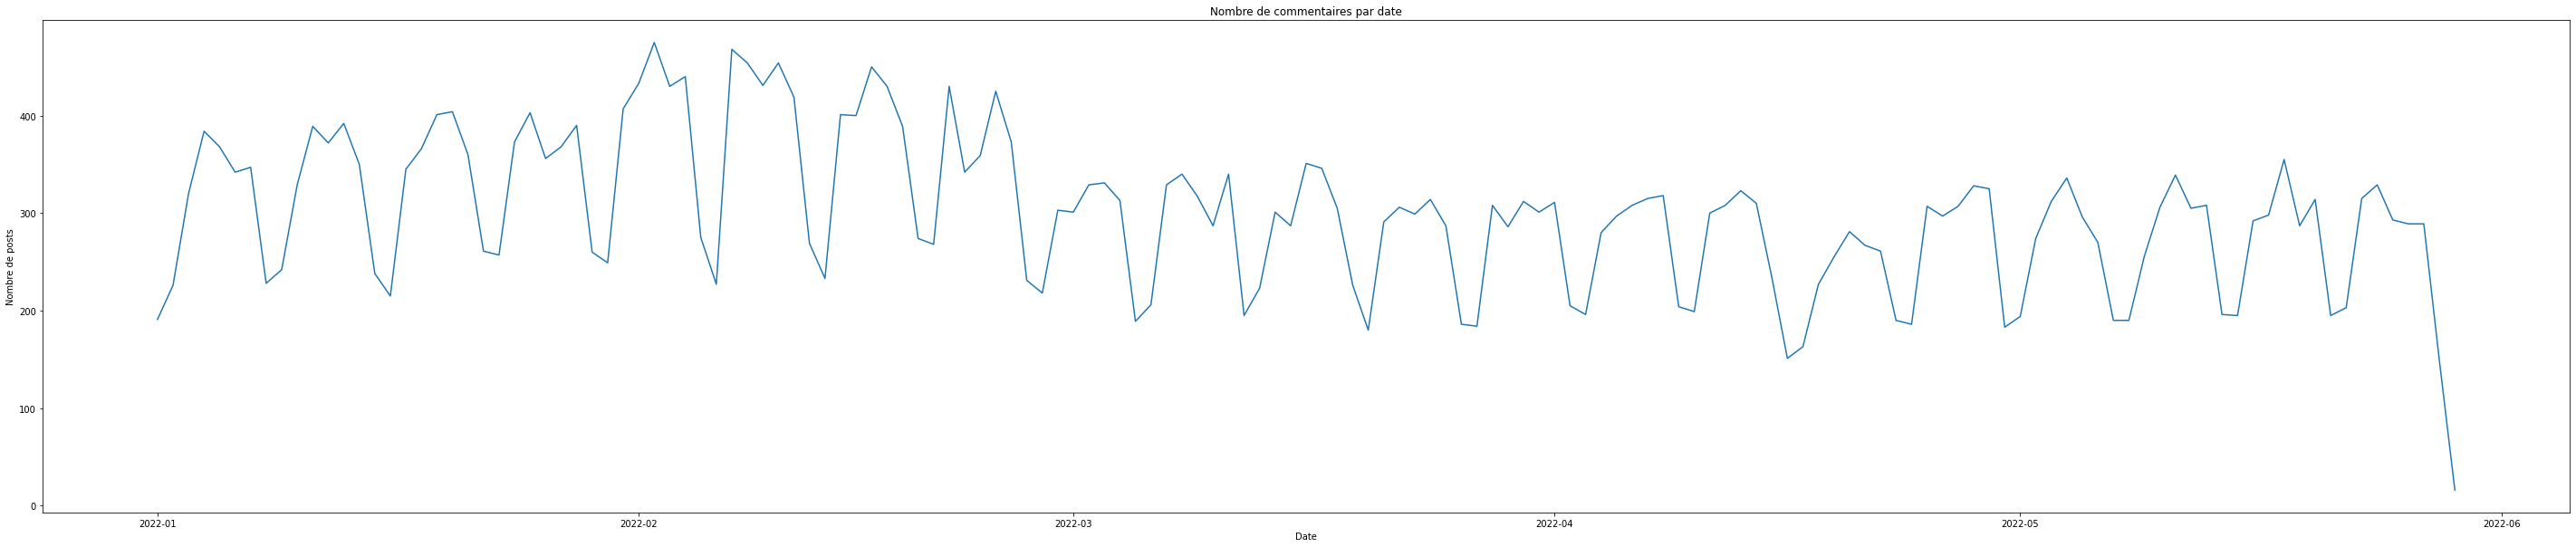

In [20]:
%pylab 
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
CreationDateByDay = data['CreationDate'].dt.date.value_counts()

sns.lineplot(data=CreationDateByDay, x=CreationDateByDay.index, y=CreationDateByDay.values, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

Nous constatons une baisse d’activité sur la période. 

Nous pouvons en déduire une proportion de posts décroissante dans le temps. Donc, filtrer les posts par date de création pénaliserait les publications les plus récentes et les thématiques qui y sont associées.

In [33]:
df=data.copy()

In [34]:
df

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,CreationDateTimeDelta,ViewCountByDay
Id,,,,,,,,,,,
70546339,2022-01-01 00:06:23,2,140,1,2,2,Using A Parent Associative Foreach Loop That C...,<p>I have a form that outputs images and their...,<php><foreach><pdo><associative-array>,148,9.459459e-01
70546372,2022-01-01 00:18:35,2,62,1,0,0,How to run sql script in mysql on Ubuntu?,<p>I am new to sql. I know I can run script wi...,<mysql><sql><script>,148,4.189189e-01
70546392,2022-01-01 00:25:21,1,537,1,1,1,token verification failing using JWK/JWT for u...,<p>I am trying to verify an idToken using a pu...,<python><oauth-2.0><jwt><rsa><jwk>,148,3.628378e+00
70546410,2022-01-01 00:31:32,2,280,2,6,1,"Should the ""opening work"" of a context manager...","<p>I found the <a href=""https://book.pythontip...",<python><contextmanager>,148,1.891892e+00
70546458,2022-01-01 00:44:42,-3,86,1,3,1,Do all datastructures use arrays?,"<p>Do all data structures use arrays? If not, ...",<java>,148,5.810811e-01
...,...,...,...,...,...,...,...,...,...,...,...
72420640,2022-05-29 03:10:00,0,14,0,0,1,Flutter TextField inputFormatters not wokring ...,<p>I want to allow this kind of input to my te...,<regex><flutter><dart><textfield>,0,1.400000e+10
72420715,2022-05-29 03:29:48,0,11,1,0,1,How to send values from Django views function ...,"<p>My Django Template:</p>\n<pre class=""lang-h...",<python><django>,0,1.100000e+10
72420785,2022-05-29 03:52:56,0,8,0,0,1,Prioritise local cache over Network in Coil,<p>I am using Coil with Jetpack compose. I not...,<android-jetpack-compose><coil>,0,8.000000e+09


# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [35]:
df['Timestamp'] = pd.to_datetime(df['CreationDate'])

In [36]:
df['Year'] = df.Timestamp.apply(lambda x: x.year)
df['Month'] = df.Timestamp.apply(lambda x: x.month)
df['Day'] = df.Timestamp.apply(lambda x: x.day)
df['Hour'] = df.Timestamp.apply(lambda x: x.hour)
df['Weekday'] = df.Timestamp.apply(lambda x: x.weekday())

In [37]:
df['days_from_creation'] = (df.Timestamp.max() - df.Timestamp)/np.timedelta64(1, 'D')

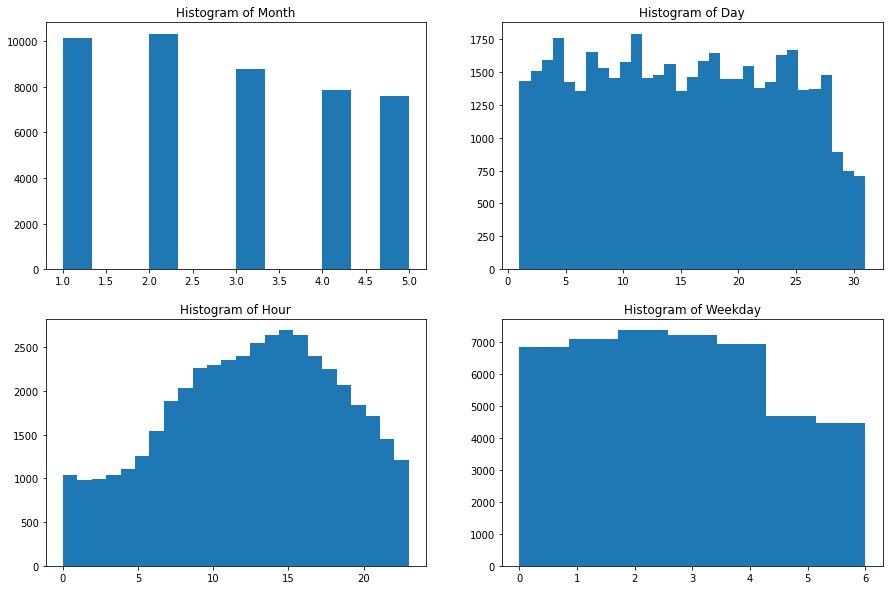

In [38]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(df[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после окончания уроков у основной аудитории
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

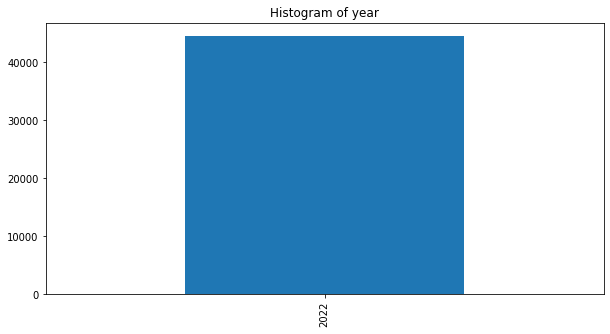

In [39]:
df.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [40]:
df.Year.value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100))

2022    100.00%
Name: Year, dtype: object

In [42]:
df.CreationDate.value_counts()[:10]

2022-04-11 17:04:22    2
2022-02-17 15:16:15    2
2022-01-18 07:31:29    2
2022-02-16 12:07:04    2
2022-03-30 15:39:29    2
2022-02-14 18:08:33    2
2022-02-07 22:41:50    2
2022-05-25 11:58:31    2
2022-02-14 17:50:55    2
2022-01-28 20:46:56    2
Name: CreationDate, dtype: int64

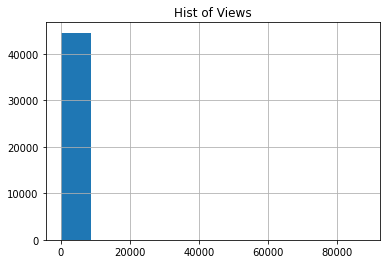

In [47]:
df.ViewCount[df.ViewCount>0].hist(bins=10)
plt.title("Hist of Views")
plt.show()

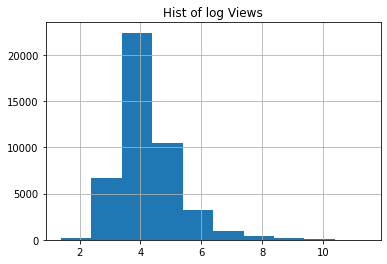

In [48]:
df.ViewCount[df.ViewCount>0].apply(np.log).hist(bins=10)
plt.title("Hist of log Views")
plt.show()

In [49]:
df['average_views'] = df.ViewCount/df.days_from_creation

In [50]:
df[df['average_views']==df['average_views'].max()]

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,CreationDateTimeDelta,ViewCountByDay,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views
Id,,,,,,,,,,,,,,,,,,,
72420903,2022-05-29 04:26:11,2,7,0,0,1,Converting kivy code to apk with firestore,<p>I am trying to convert kivy code to apk whi...,<python><android><google-cloud-firestore><kivy...,0,7.000000e+09,2022-05-29 04:26:11,2022,5,29,4,6,0.0,inf


In [52]:
index = df['average_views']==df['average_views'].max()
df['average_views'][index] =df['ViewCount'][index]

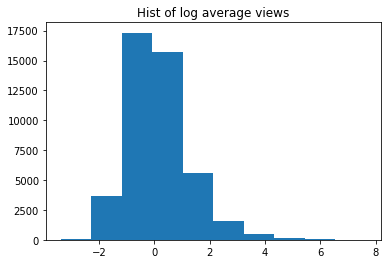

In [53]:
plt.hist(df.average_views.apply(np.log))
plt.title("Hist of log average views");

### Посмотрим на самые популярные!

In [55]:
popular = df.sort_values(by='average_views', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'Title'])
    print("Average views (per day) {}".format(round(popular.loc[i,'average_views'])))
    print('==============\n')

Meme name: 
Heroku and GitHub: "Items could not be retrieved, Internal server error"
Average views (per day) 2057

Meme name: 
CSS transition display: none is getting reversed
Average views (per day) 1858

Meme name: 
Is there any practical use for a function that does nothing?
Average views (per day) 1629

Meme name: 
Deprecation notice: ReactDOM.render is no longer supported in React 18
Average views (per day) 1115

Meme name: 
How to wrap text without regard to space and hyphen
Average views (per day) 1079

Meme name: 
fatal: unsafe repository ('/home/repon' is owned by someone else)
Average views (per day) 971

Meme name: 
I cannot add the parent directory to *safe.directory* in Git
Average views (per day) 839



# Комментарии

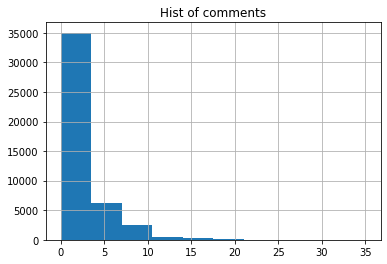

In [56]:
df.CommentCount.hist()
plt.title("Hist of comments")
plt.show()

### Посмотрим на самые комментируемые

In [59]:
df['average_comments'] = df.CommentCount/df.days_from_creation
index = df['average_comments']==df['average_comments'].max()
df['average_comments'][index] = df['CommentCount'][index]
popular = df.sort_values(by='average_comments', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'Title'])
    print("Average comments (per day) {}".format(round(popular.loc[i,'average_comments'])))
    print('==============\n')

Meme name: 
if/else in loop is slightly faster than if/continue in clang
Average comments (per day) 113

Meme name: 
Lock-free producer consumer
Average comments (per day) 45

Meme name: 
The definition of lock-free
Average comments (per day) 27

Meme name: 
Find matrix row elements in a binary tree
Average comments (per day) 25

Meme name: 
How do I read the information from multiple txt files?
Average comments (per day) 22

Meme name: 
How would I make a format number function in javascript?
Average comments (per day) 20

Meme name: 
How to delete millions of rows from an Azure database?
Average comments (per day) 18



### Score

Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


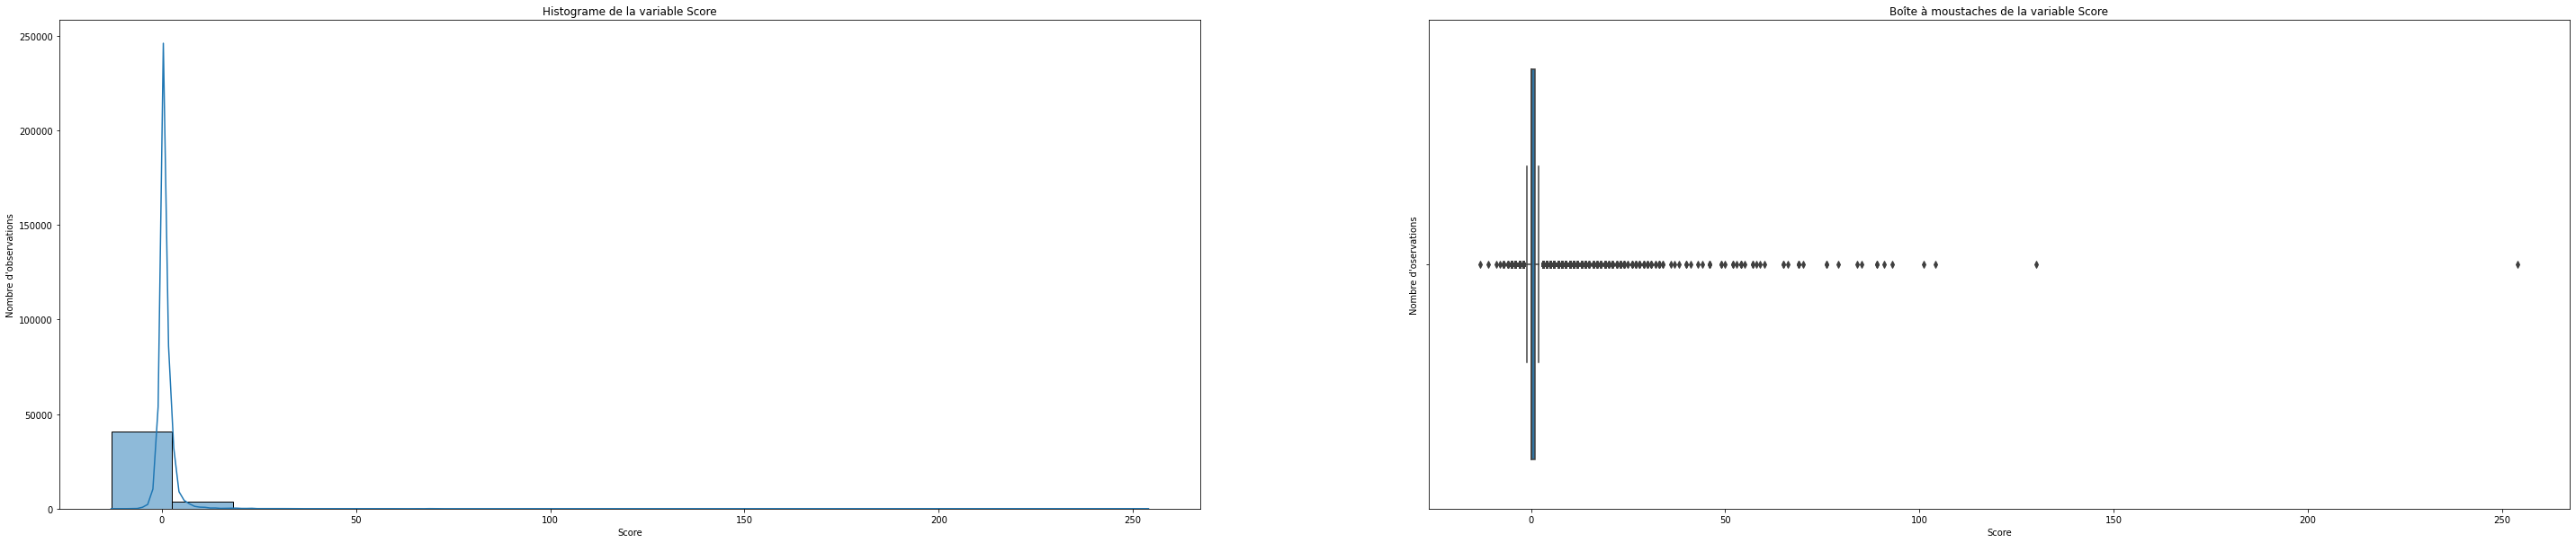


--------------------------------------------------

Indicateurs statistiques de distribution de la variable Score:


count    44631.000000
mean         0.860881
std          3.144575
min        -13.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        254.000000
Name: Score, dtype: float64

In [21]:
%pylab 
%matplotlib inline
import seaborn as sns


def plot_continuous_distribution(data, col, bins='sturges'):
    """
    Plot distribution plot, box plot and statistical distribution figures
    
    Args: 
        data(DataFrame): Name of the dataframe 
        
        col(String): Name of the column to plot
        
    Returns:
        Variable distribution plots and figures
    """
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
    
    sns.histplot(data=data, x=col, bins='sturges', kde=True, ax=ax[0])
    ax[0].set_xlabel(f"{col}")
    ax[0].set_ylabel("Nombre d'observations")
    ax[0].set_title(f"Histograme de la variable {col}")
    
    sns.boxplot(data=data, x=col)
    ax[1].set_xlabel(f"{col}")
    ax[1].set_ylabel("Nombre d'oservations")
    ax[1].set_title(f"Boîte à moustaches de la variable {col}")
    plt.show()
    
    print("\n" + "-" * 50 + "\n")
    print(f"Indicateurs statistiques de distribution de la variable {col}:")
    display(data[col].describe())
    
    
plot_continuous_distribution(data=data, col='Score')

Nous constatons une distribution centrée autour de la valeur 1 avec une majrité d'observation situées dans l'interquartile entre 0 et 3. 

### ViewCount

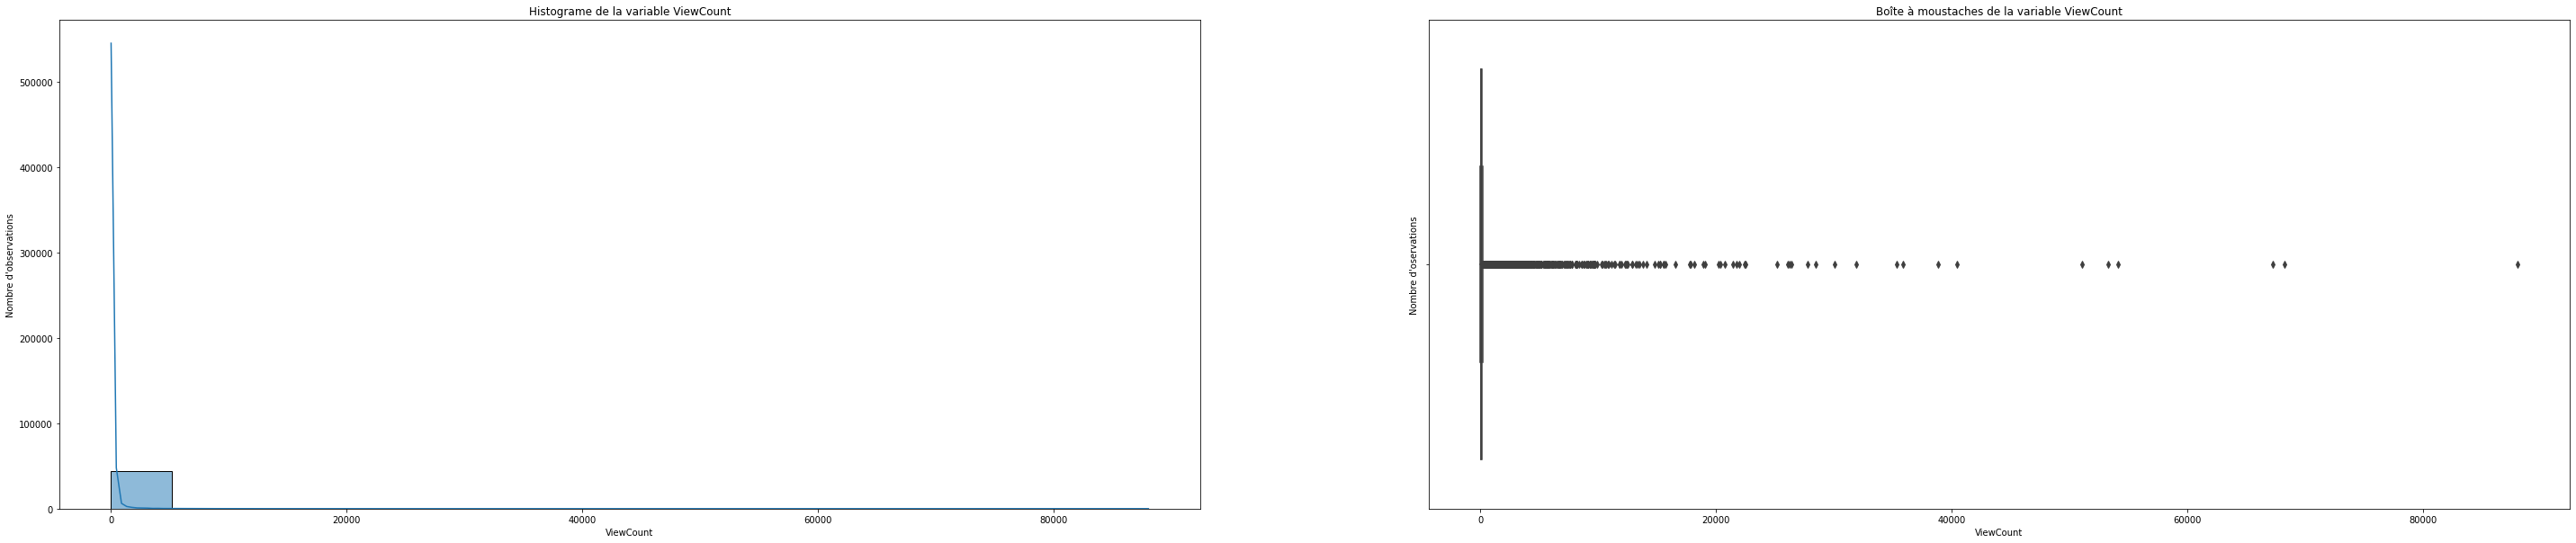


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCount:


count    44631.000000
mean       175.351594
std       1129.155608
min          4.000000
25%         36.000000
50%         57.000000
75%        105.000000
max      88061.000000
Name: ViewCount, dtype: float64

In [22]:
plot_continuous_distribution(data=data, col='ViewCount')

Nous constatons une distribution centrée autour de 98 avec un équart interquartile entre 79 et 1211.

### AnswerCount

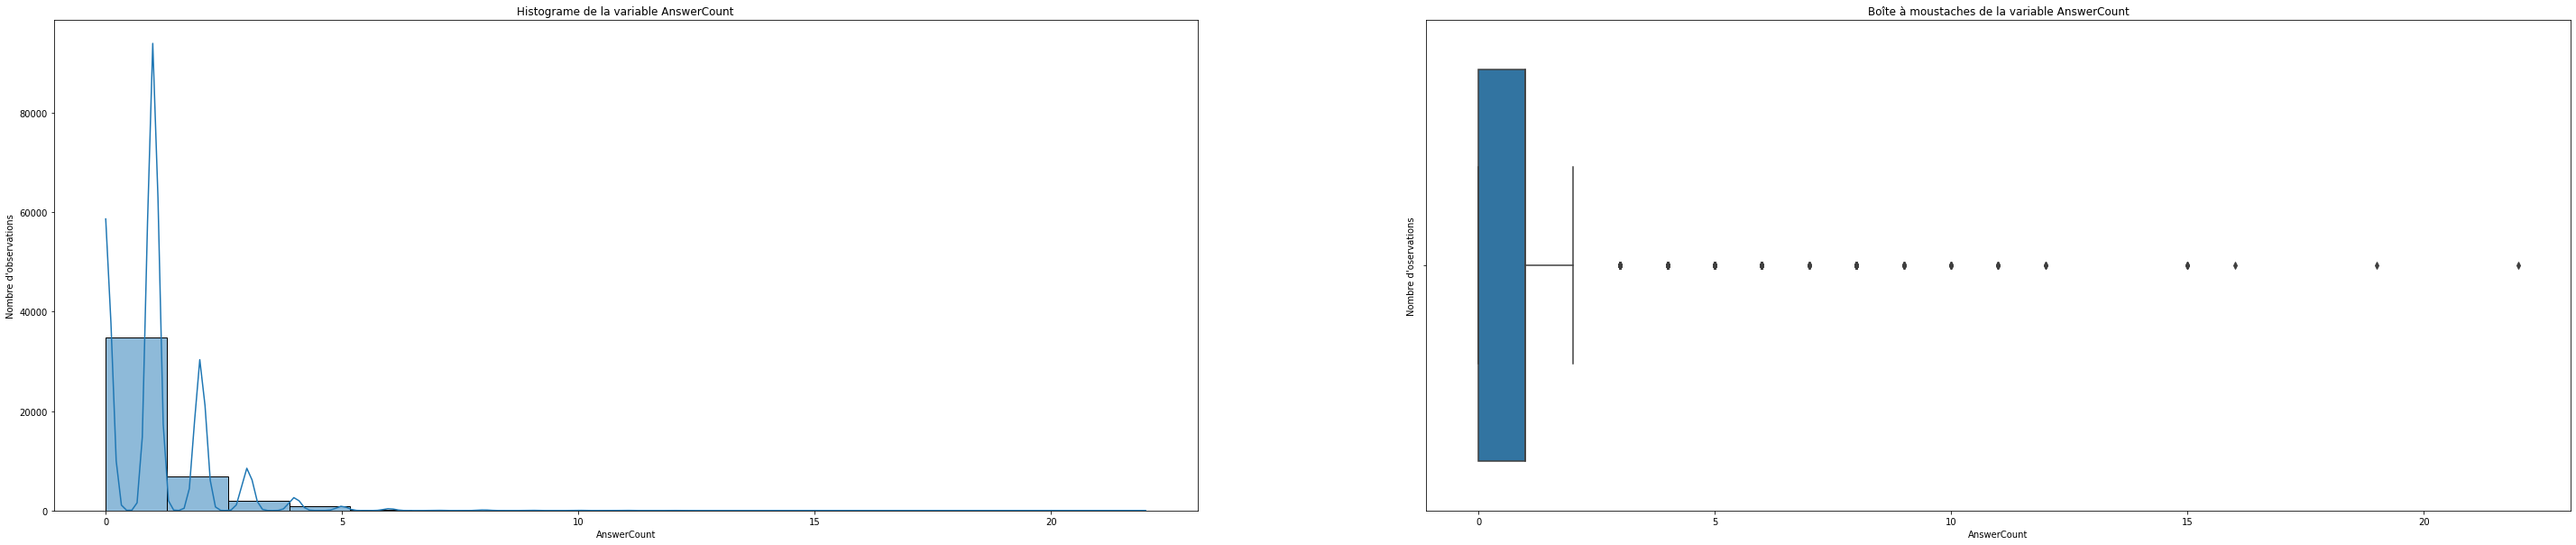


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    44631.000000
mean         1.025386
std          1.000563
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: AnswerCount, dtype: float64

In [23]:
plot_continuous_distribution(data=data, col='AnswerCount')

La distribution de la variable est centrée autour de 1 avec un équart interquartile entre 1 et 2

### CommentCount

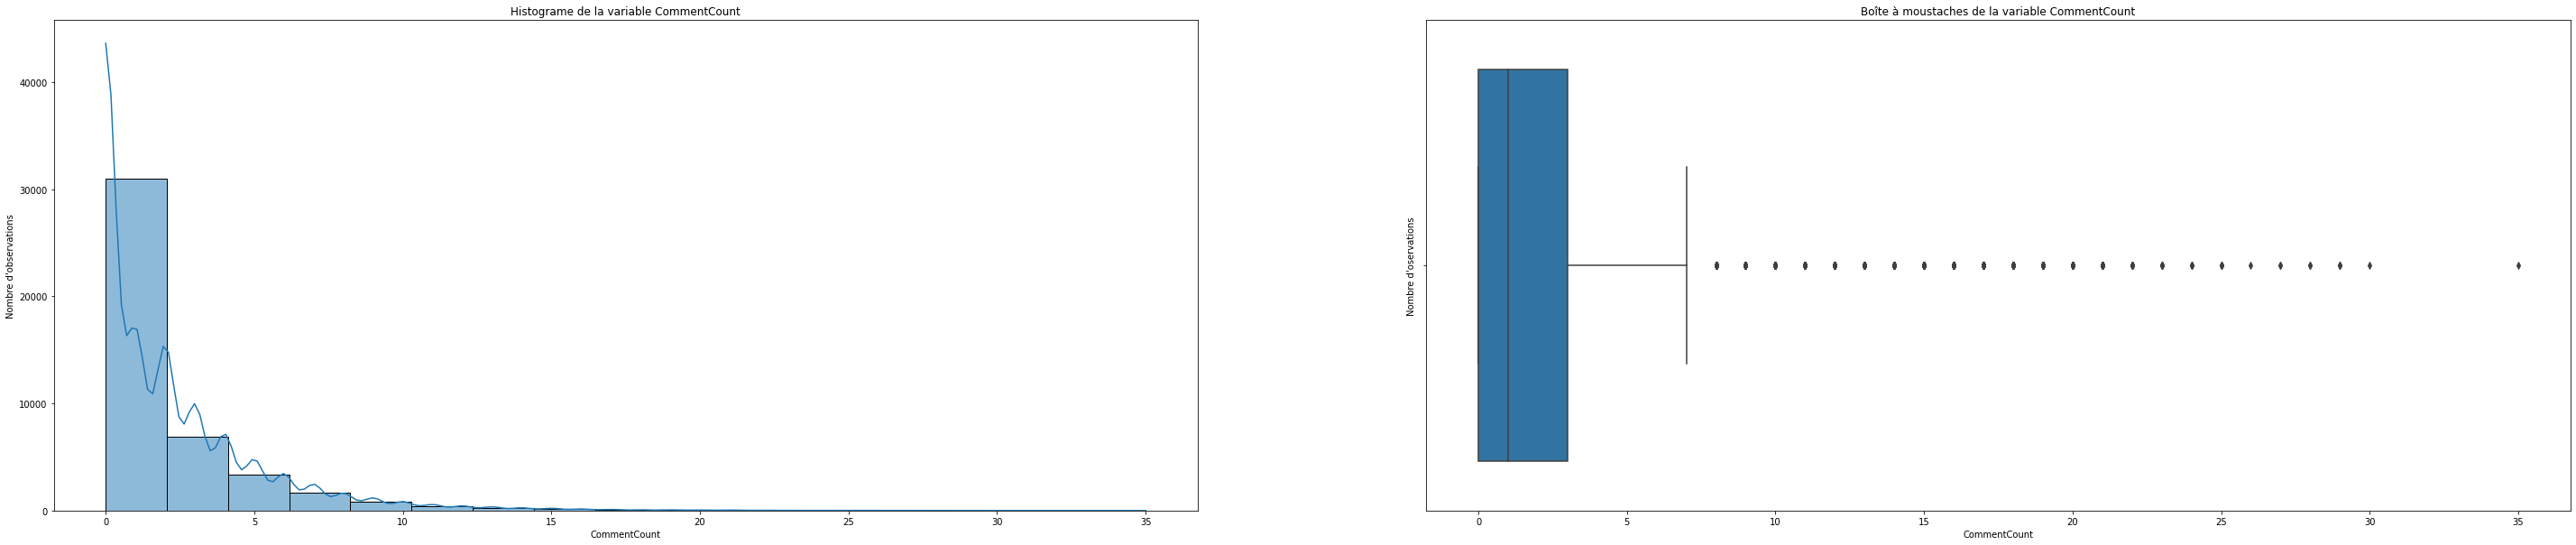


--------------------------------------------------

Indicateurs statistiques de distribution de la variable CommentCount:


count    44631.000000
mean         2.104681
std          2.888770
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         35.000000
Name: CommentCount, dtype: float64

In [24]:
plot_continuous_distribution(data=data, col='CommentCount')

La variable est centrée autour de 1 avec un interquartile entre 0 et 3

### FavoriteCount

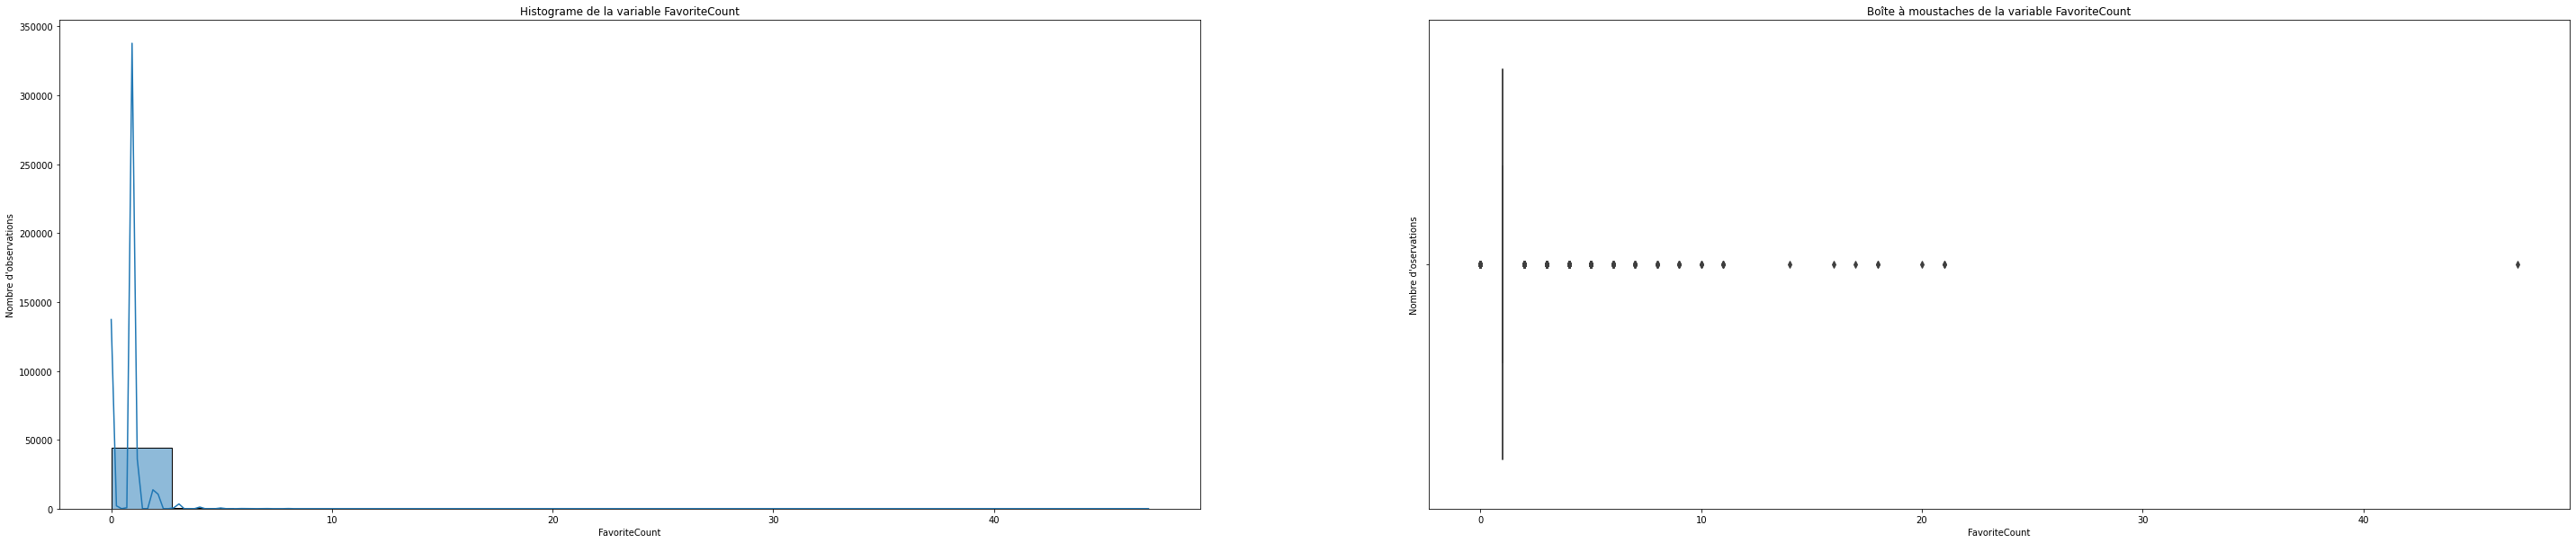


--------------------------------------------------

Indicateurs statistiques de distribution de la variable FavoriteCount:


count    44631.000000
mean         0.866953
std          0.692846
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: FavoriteCount, dtype: float64

In [25]:
plot_continuous_distribution(data=data, col='FavoriteCount')

Nous observons que la majorité des observations est située autour de 1. Observons à présent le nombre d'observations ayant une valeur supérieure.

In [26]:
fav_count_filter = data[data["FavoriteCount"]>1].copy()
print(f"Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {fav_count_filter.shape[0]}")
print(f"Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {round(fav_count_filter.shape[0]/data.shape[0]*100,2)}%")

Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 3098
Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 6.94%


### ViewCountByDay

Nous estimons que le ViewCount peu représenter un biais dans la mesure que des posts plus anciens ont potentiellement une propention à avoir un ValueCount plus élevé. Afin de vérifier l'hypothèse nous procédons de la sorte:
- Construction d'une variable CreationDateTimeDelta : différence entre la valeur maximum de CreationDate et valeur CreationDate de chaque observation
- Visualisation la distribution des points entre les variables ViewCount et CreationDateTimeDelta

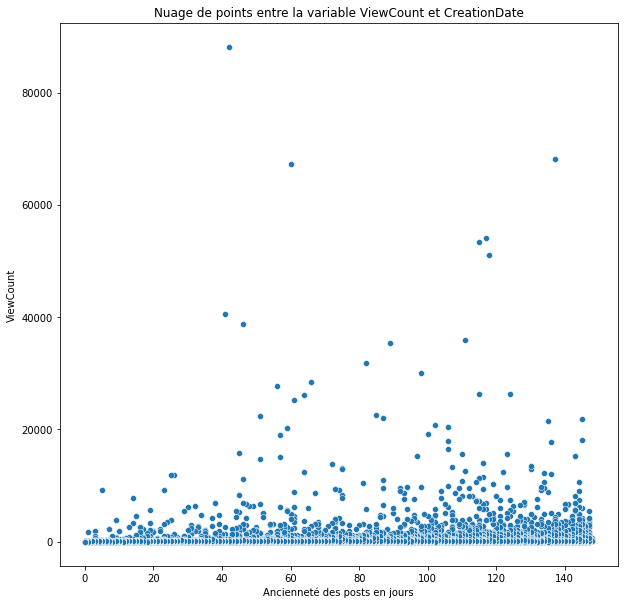

In [27]:
last_post = data["CreationDate"].max()
data["CreationDateTimeDelta"] = last_post - data["CreationDate"]
data["CreationDateTimeDelta"] = data["CreationDateTimeDelta"].dt.days

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.scatterplot(data=data, x="CreationDateTimeDelta", y="ViewCount", ax=ax)
ax.set_xlabel("Ancienneté des posts en jours")
ax.set_label("Nombre de vues")
ax.set_title("Nuage de points entre la variable ViewCount et CreationDate")
plt.show()

Nous n'observons pas de corrélation linéaire nette entre les deux variables sur l'ensemble des observations. Un phénomène est toutefois constatable sur certaines observations. Afin d'apprécier les corrélations, nous réalisons un des test de Pearson et de Spearman.

In [28]:
def corr_test(var1, var2, method='pearson'):
    """
    Statistical correlation test between two variables.
    
    Args:
        var1(dataframe Series): First Series to check correlation
        
        var2(dataframe Series): Second Series to check correlation
        
        method: Used method to compute correlation metric between 'pearson' and 'spearman'
        
    Returns:
        stat(float): Computed correlation metric
        
        p(float): Computed p value
    
    """
    import scipy.stats as st
    print("-"*50)
    if method == 'pearson':
        print(f"Test statistique de corrélation linéaire de Pearson entre {var1.name} et {var2.name}\n")
        stat, p = st.pearsonr(var1,var2)
        print(f"""Coeficient de corrélation linéaire de Pearson: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")
    if method == 'spearman':
        print(f"Test statistique de corrélation de rang de Spearman entre {var1.name} et {var2.name}\n")
        stat, p = st.spearmanr(var1,var2)
        print(f"""Coeficient de corrélation de rang de Spearman: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")       
    print("-"*50)
    
    
    return stat, p

corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'pearson')
corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'spearman')

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation linéaire de Pearson: 0.06135234036844335
 p valeur: 1.7366179867739266e-38

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation de rang de Spearman entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation de rang de Spearman: 0.3818719149868831
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.3818719149868831, 0.0)

Les deux tests permettent de rejetter l'indépendance des variables. Ils permettent également de constater une corrélation linéaire faible et une corrélation de rang moyenne entre les deux variables. Afin d'apprécier la pertience d'un post en minimisant l'effet d'ancienneté, nous créons une variable ViewCountByDay. Il s'agit du rapport entre le nombre de vues (ViewCount), et l'ancienneté des posts (CreationDateTimeDelta)

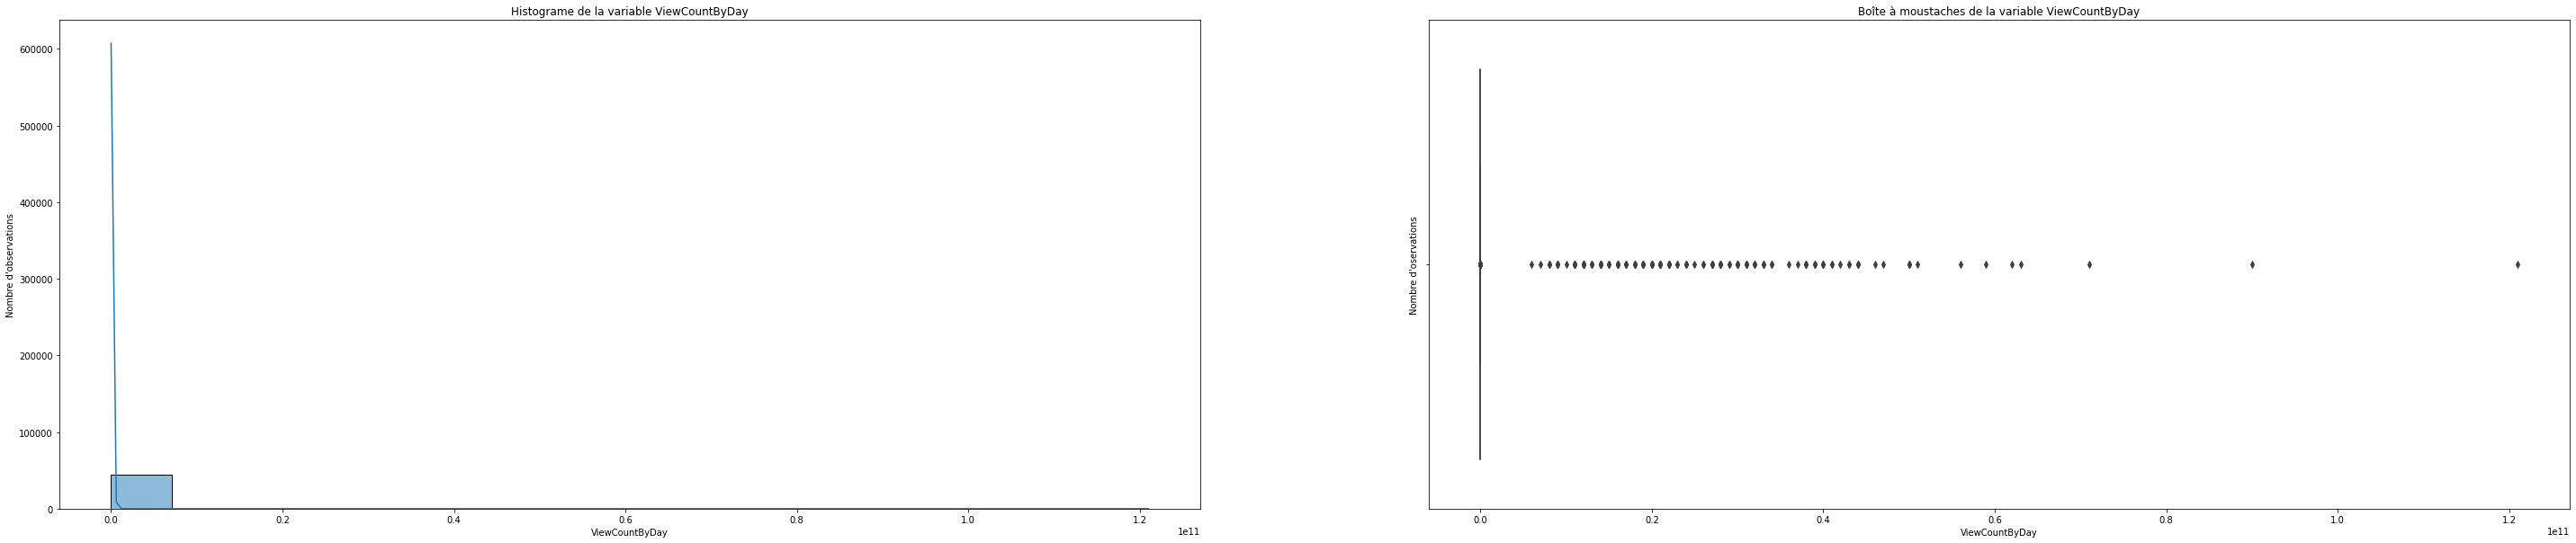


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCountByDay:


count    4.463100e+04
mean     8.787614e+07
std      1.769823e+09
min      3.478261e-02
25%      5.402299e-01
50%      1.011364e+00
75%      2.096774e+00
max      1.210000e+11
Name: ViewCountByDay, dtype: float64

In [29]:
data['ViewCountByDay'] =  data['ViewCount'] / (data['CreationDateTimeDelta']+0.000000001)
plot_continuous_distribution(data=data, col='ViewCountByDay')

### Corrélations entre les variables numériques

Afin d'évaluer les corrélations entre les variables, nous réalisons les matrices  Pearson et Spearman. 

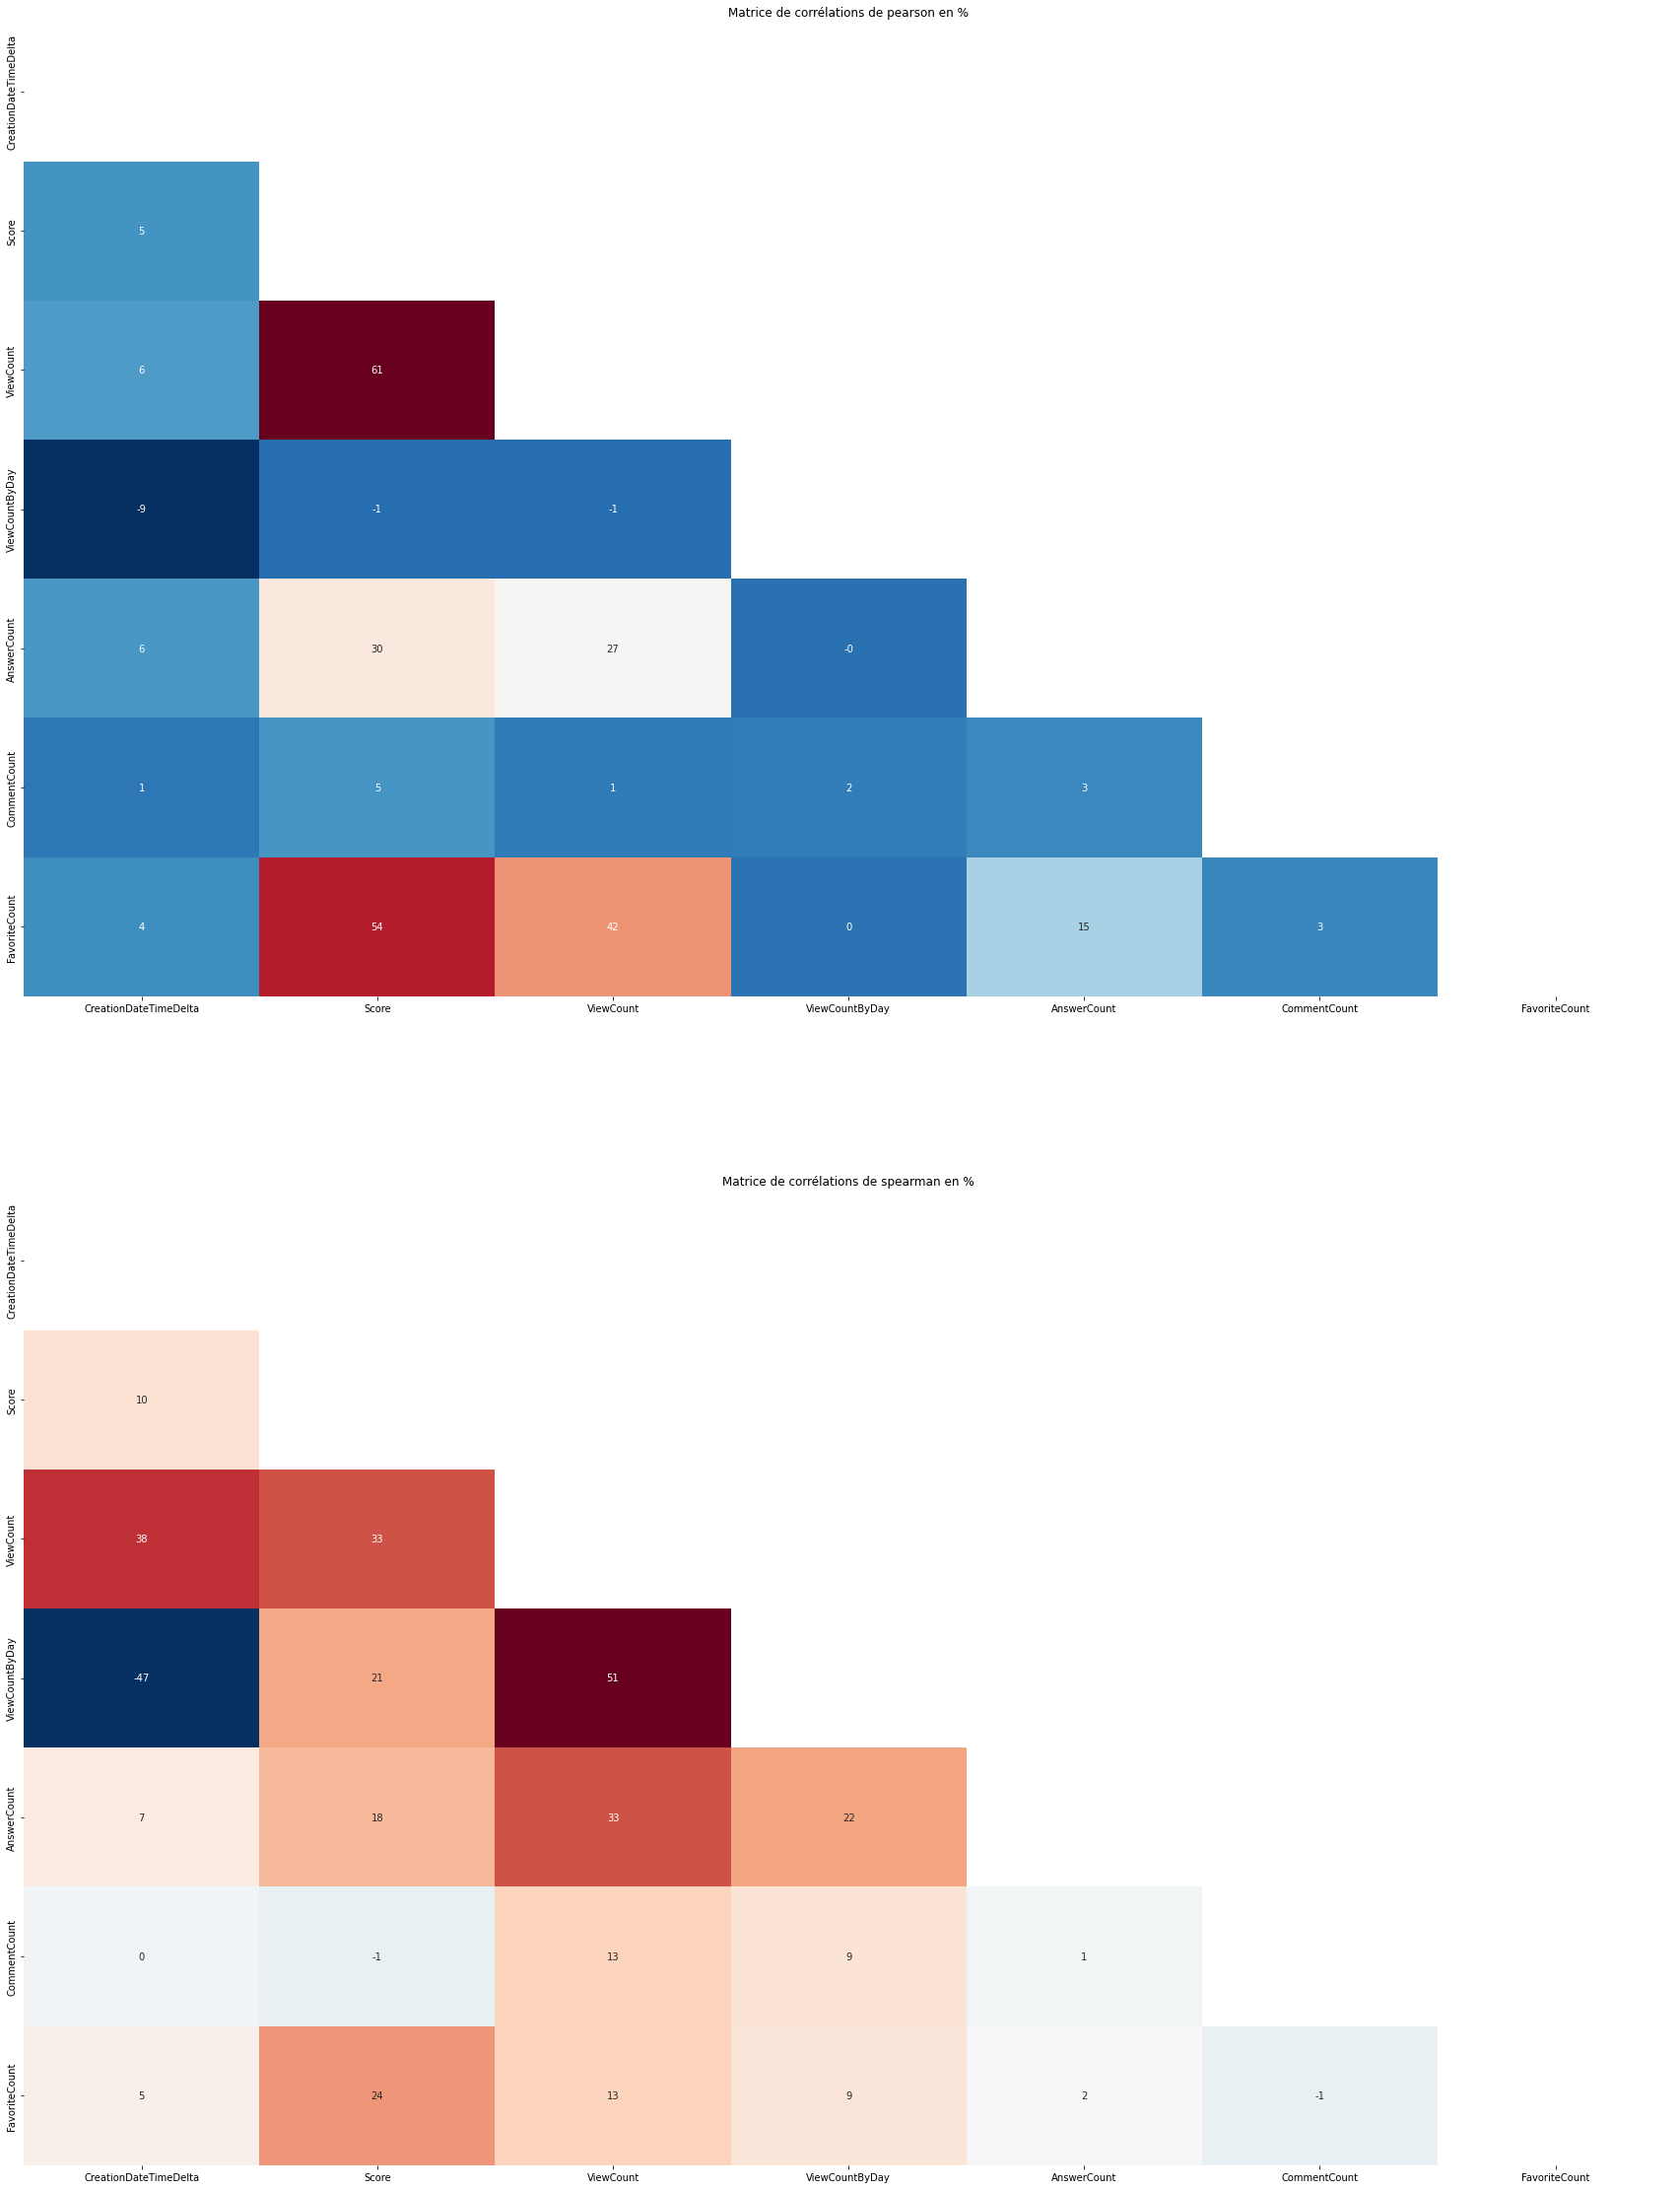

In [30]:
def correlations(data, methods):
    """
    Plot correlation matrix for quantitatives values.
    
    Args:
        data(dataframe): A dataframe
        
        method(string): CHosen method to compute correlation. Might be "pearson", "spearman" or "kendall"
        
    Returns:
        Correlation matrix
    """
    
    correlations = []
    cleanning_masks = []
    for method in methods: 
        correlation = data.select_dtypes(include=['int64','float64']).corr(method=method) * 100
        cleanning_mask = np.zeros_like(correlation)
        upper_triangle = np.triu_indices_from(correlation)
        cleanning_mask[upper_triangle] = 1
        correlations.append(correlation)
        cleanning_masks.append(cleanning_mask)

        
    fig, axes = plt.subplots(nrows=len(methods), figsize=(30,40))
    fig.subplots_adjust(wspace=0.2)

    for i in range(len(axes)):
        sns.heatmap(correlations[i], ax=axes[i], cmap="RdBu_r", mask = cleanning_masks[i], 
                   annot = True, fmt=".0f", cbar=False)

        axes[i].set_title(f"Matrice de corrélations de {methods[i]} en %")
  
    
correlations(data[["CreationDate","CreationDateTimeDelta","Score","ViewCount", "ViewCountByDay","AnswerCount","CommentCount","FavoriteCount"]], methods=["pearson", "spearman"])

Les visualisations permettent effectivement de constater des corrélations plus faibles avec la variable ViewCountByDay que VeiwCount . Nous décidons donc d’utiliser cette dernière. 

## Filtrage des données

Au vu de l'étude préalable nous décidons de placer un seuil à 0 pour les variables Socre, AnswerCount, CommentCount et FavoriteCount ainsi qu'un seuil à 5 pour ViewCountByDay.

In [31]:
filtered_data = data[(data['Score'] > 0) &
                           (data['AnswerCount']>0) &
                           (data['CommentCount']>0) &
                           (data['FavoriteCount']>0) &
                           (data['ViewCountByDay']>5)]
filtered_data.sort_values(['Score', 'ViewCount'], ascending=[False, False], inplace=True)
filtered_data_prop = round((filtered_data.shape[0] / data.shape[0] * 100),2)
display(filtered_data)
print(f"Porportion de données restantes: {filtered_data_prop}%")

filtered_data.to_csv('./data/filtered_data.csv')

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,CreationDateTimeDelta,ViewCountByDay
Id,,,,,,,,,,,
71892543,2022-04-16 09:01:47,254,88061,11,4,47,"Heroku and GitHub: ""Items could not be retriev...",<p>I simply want to connect to my GitHub accou...,<github><heroku>,42,2.096690e+03
71849415,2022-04-12 21:38:34,104,38844,19,4,17,I cannot add the parent directory to *safe.dir...,<p>After updating Git to <code>v2.35.2.windows...,<git><cve-2022-24765>,46,8.444348e+02
70882092,2022-01-27 16:23:17,101,7414,3,10,18,Can we make 1 == 2 true?,<p>Python <code>int</code>s are <strong>object...,<python><cpython><python-internals>,121,6.127273e+01
71177450,2022-02-18 17:17:18,93,4899,8,5,6,Unable to restore Visual Studio 2022 window (I...,"<p>I have Visual Studio 2022, newest version 1...",<python><windows><visual-studio-2022>,99,4.948485e+01
71901632,2022-04-17 11:49:59,91,40478,15,2,21,fatal: unsafe repository ('/home/repon' is own...,<p>I found error log from apache2 that is fata...,<git><cve-2022-24765>,41,9.872683e+02
...,...,...,...,...,...,...,...,...,...,...,...
72392711,2022-05-26 13:35:54,1,22,1,5,1,Delete all .htaccess files form host using php...,<p>i need to delete all .htaccess files from t...,<php><.htaccess><host>,2,1.100000e+01
72393734,2022-05-26 14:48:01,1,22,1,1,1,preg_match_all returns only last matches from ...,<p>I try to find all occurrences of sub-string...,<php><preg-match-all>,2,1.100000e+01
72414148,2022-05-28 08:36:22,1,22,1,1,1,Golang array with forEach to fill model,<p>I have a dynamic import where people can ch...,<go>,0,2.200000e+10


Porportion de données restantes: 2.85%
